In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

learning_rate = 1e-3
batch_size = 64
epochs = 5

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

100%|██████████| 26421880/26421880 [00:02<00:00, 10958462.49it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 207449.87it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3705971.03it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21168899.01it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
%pip install -i https://test.pypi.org/simple/ fasttrain

Looking in indexes: https://test.pypi.org/simple/


In [4]:
from fasttrain import Trainer
from fasttrain.metrics import accuracy

class FashionMNISTTrainer(Trainer):

    def predict(self, input_batch):
        (x_batch, _) = input_batch
        return self.model(x_batch)

    def compute_loss(self, input_batch, output_batch):
        (_, y_batch) = input_batch
        return nn.CrossEntropyLoss()(output_batch, y_batch)

    def eval_metrics(self, input_batch, output_batch):
        (_, y_batch) = input_batch
        return {
            "accuracy": accuracy(output_batch, y_batch, task="multiclass")
        }

In [5]:
from fasttrain.callbacks import Tqdm

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
trainer = FashionMNISTTrainer(model, optimizer)
history = trainer.train(train_dataloader, val_data=test_dataloader, num_epochs=epochs, callbacks=[Tqdm(colab=True)])

Using cpu


Training:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 2:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 3:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 4:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 5:   0%|          | 0/938 [00:00<?, ?it/s]

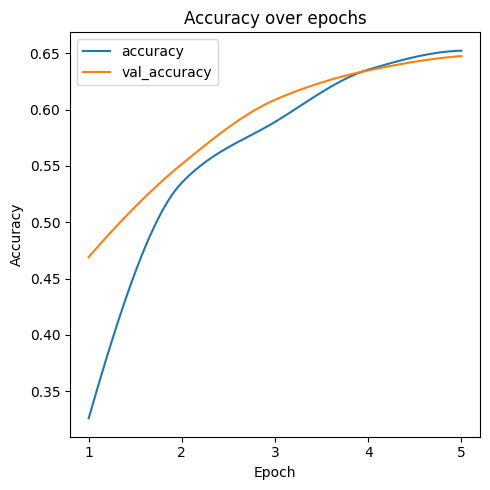

(<Figure size 500x500 with 1 Axes>,
 <Axes: title={'center': 'Accuracy over epochs'}, xlabel='Epoch', ylabel='Accuracy'>)

In [6]:
history.plot("accuracy", with_val=True)

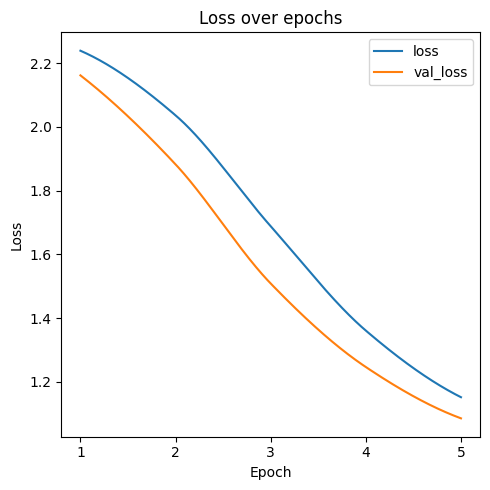

(<Figure size 500x500 with 1 Axes>,
 <Axes: title={'center': 'Loss over epochs'}, xlabel='Epoch', ylabel='Loss'>)

In [7]:
history.plot("loss", with_val=True)